In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dti = pd.date_range('2020-06-01', periods=92*24, freq='H')
df = pd.DataFrame(index=dti)

def get_day_name(inp, fre='D'):
    return pd.Timestamp(inp, freq=fre).day_name()
def get_day_nameHn(inp, fre='24H'):
    return pd.Timestamp(inp, freq=fre).day_name()
def get_day_nameH(inp, fre='24H'):
    return pd.Timestamp(inp, freq=fre)
# day_names = list(map(get_day_name , dti))

# hier_index = list(zip(dti,day_names))
# hier_index = pd.MultiIndex.from_tuples(hier_index)
# df.set_index(hier_index , inplace=True)

In [3]:
def add_project(df , p_name , p_start = '2020-06-02 10:00:00', p_end = '2020-07-04 10:00:00' ,attemps_freq=3 ):
    start_day = pd.Timestamp(p_start , freq='H')
    end_day = pd.Timestamp(p_end , freq='H')
    length_of_project = (end_day-start_day).days

    num_of_attempts = int(length_of_project/attemps_freq)+1
    days_of_attempts = pd.date_range(start_day , periods=num_of_attempts , freq=str(attemps_freq*24)+'H')
    days_of_attempts = list(map(get_day_nameH , days_of_attempts))

    df[p_name] = np.zeros(len(df))

    df[p_name].loc[days_of_attempts] = 1.0
    
    return df


In [4]:
add_project(df , 'Thesis' , p_start='2020-06-02 10:00:00' , p_end='2020-07-04 10:00:00' , attemps_freq=4)
add_project(df , 'Charcoal' , p_start='2020-06-10 12:00:00' , p_end='2020-07-04 10:00:00' , attemps_freq=3)
add_project(df , 'Language' , p_start='2020-06-04 14:00:00' , p_end='2020-07-04 10:00:00' , attemps_freq=2.5)
add_project(df , 'Coding' , p_start='2020-06-12 16:00:00' , p_end='2020-07-04 10:00:00' , attemps_freq=2)

,Thesis,Charcoal,Language,Coding
2020-06-01 00:00:00,0.0,0.0,0.0,0.0
2020-06-01 01:00:00,0.0,0.0,0.0,0.0
2020-06-01 02:00:00,0.0,0.0,0.0,0.0
2020-06-01 03:00:00,0.0,0.0,0.0,0.0
2020-06-01 04:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2020-08-31 19:00:00,0.0,0.0,0.0,0.0
2020-08-31 20:00:00,0.0,0.0,0.0,0.0
2020-08-31 21:00:00,0.0,0.0,0.0,0.0
2020-08-31 22:00:00,0.0,0.0,0.0,0.0


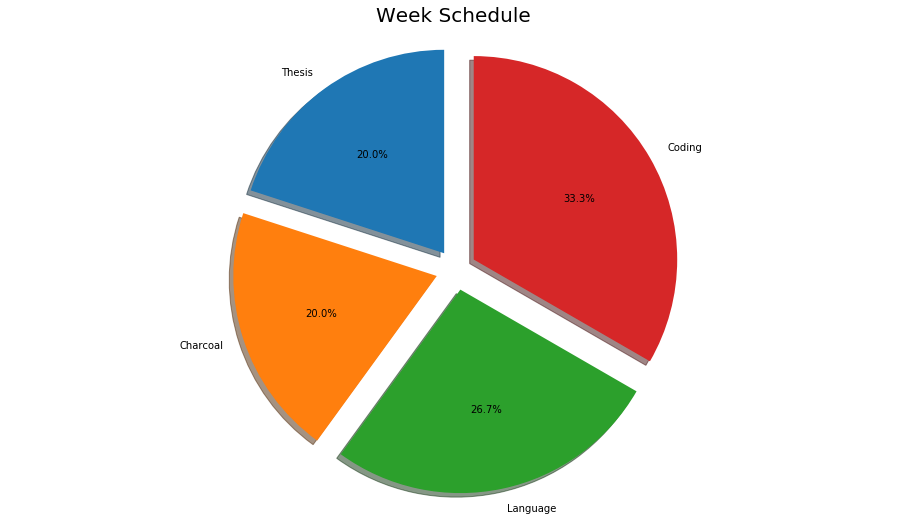

In [5]:
vals = df.resample('24H').sum().iloc[20:30].sum().values
this_week = [i/sum(vals) for i in vals]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.columns
sizes = this_week
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels ,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Week Schedule' , fontsize=20)
plt.show()

In [6]:
week_df = df.resample('24H').sum().iloc[20:30]

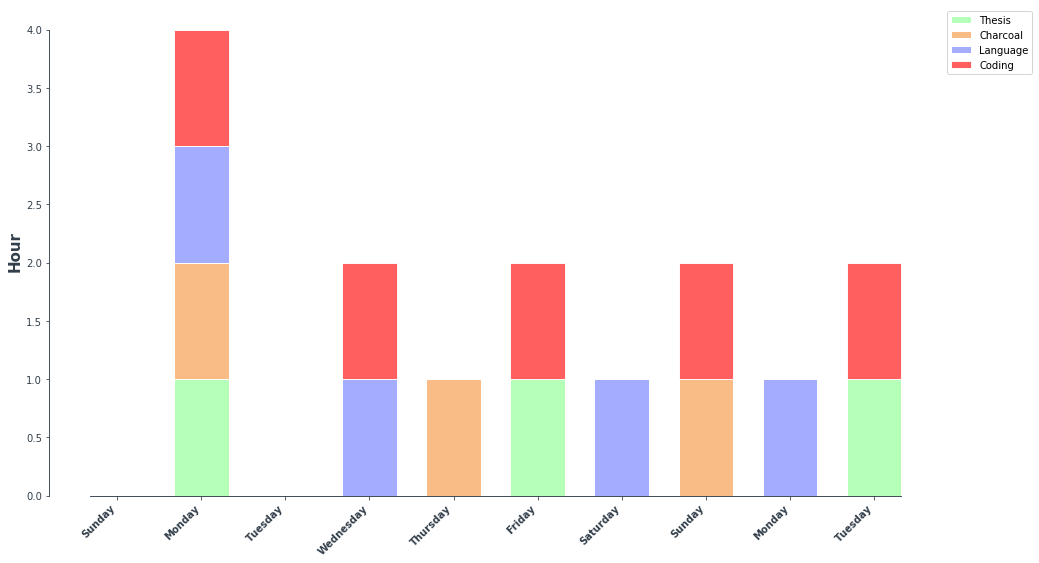

In [10]:
from matplotlib import rc
fig, ax = plt.subplots(figsize=(16,9))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.9
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

r = [0,1,2,3,4,5,6,7,8,9]
df = week_df
barWidth = 0.65
names = list(map(get_day_nameHn , week_df.index))
# Create green Bars
plt.bar(r, df[df.columns[0]], color='#b5ffb9', edgecolor='white', width=barWidth ,  label=df.columns[0])
plt.bar(r, df[df.columns[1]], bottom=df[df.columns[0]], color='#f9bc86', edgecolor='white', width=barWidth , label=df.columns[1])
plt.bar(r, df[df.columns[2]], bottom=[i+j for i,j in zip(df[df.columns[0]], df[df.columns[1]])], color='#a3acff', edgecolor='white', width=barWidth, label=df.columns[2])
plt.bar(r, df[df.columns[3]], bottom=[i+j+k for i,j,k in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]])], color='#ff4d4d', edgecolor='white', width=barWidth , alpha=0.9 ,  label=df.columns[3])
# plt.bar(r, df[df.columns[4]], bottom=[i+j+k+l for i,j,k,l in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]])], color='greenyellow', edgecolor='white', width=barWidth , label=df.columns[4])
# plt.bar(r, df[df.columns[5]], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]])], color='lightcoral', edgecolor='white', width=barWidth ,label=df.columns[5] )   
# plt.bar(r, df[df.columns[6]], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]])], color='grey', edgecolor='white', width=barWidth ,label=df.columns[6])
# plt.bar(r, df[df.columns[7]], bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(df[df.columns[0]], df[df.columns[1]] , df[df.columns[2]] , df[df.columns[3]] , df[df.columns[4]] , df[df.columns[5]] , df[df.columns[6]])], color='blueviolet', edgecolor='white', width=barWidth ,alpha=.9 , label=df.columns[7]) 

# Custom x axis
plt.xticks(r, names , fontsize=10, fontweight='black', color = '#333F4B')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Hour' , fontsize=15, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# plt.savefig('fig2.png', dpi=300, bbox_inches='tight', transparent = True)
plt.show()

# Grouping

In [8]:
# dti_frame['Language'] = np.zeros(len(dti))
# dti_frame['Python'] = np.zeros(len(dti))
# dti_frame['Charcoal'] = np.zeros(len(dti))
# dti_frame['Sticks'] = np.zeros(len(dti))
# dti_frame['Teach'] = np.zeros(len(dti))

# outside = 'Edu Edu Edu Work Work Work'.split()
# inside = 'Language Python Thesis Charcoal Stocks Teaching'.split()
# hier_index = list(zip(outside,inside))
# hier_index = pd.MultiIndex.from_tuples(hier_index)
# test_df = dti_frame.T
# hier_index
# test_df.set_index(hier_index)

In [9]:
ll = [1,2,3,4]
list(map(np.sqrt,ll))

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0]